# **Heart Disease Analysis and Detection**
* Dataset is given by Heart Trek.
* Dataset Contains details of the patient who have Heart Disease.

**<h3>Coronary Artery Disease:</h3>** 

- It refers to the **narrowing or blockage** of the **coronary arteries**, usually caused by the **build-up** of **cholesterol** and **fatty deposits** (called plaques) on the **inner walls** of the **arteries**.

- These plaques can restrict blood flow to the heart muscle by **physically** **clogging** the **artery** or by causing **abnormal** artery **tone** and **function**.

- This can **cause chest pain** called **Angina**. When **one or more** of the **coronary arteries** are completely **blocked**, a **heart attack** may occur.


There are **various factors** that **affects** coronary **heart disease**. These are as follows:

- Risk factors like gender, family history, race, ethnicity etc. are **non-modifiable (unable to cure)**.

- Risk factors like cigarette smoking, high blood cholesterol levels, high blood pressure, physical inactivity, etc. are **modifiable**.

# **Problem Statement**
---

- **Most of the time** it is **impossible** to **identify** whether a person has **heart disease** or not **because** **diagnosis** of a heart disease is **performed** on a **combination of clinical symptoms and tests results** which is **calculated through traditional processes**. 

- **Due to** the availability of **huge number of risk factors** it is **impossible** to **achieve** **accurate** **results** all the time.

In [5]:
!pip install -q yellowbrick   

In [6]:
import numpy as np
import pandas as pd

#For Generating the statistical Report
from pandas_profiling import ProfileReport

# For Random seed values
from random import randint

# For Scientifc Python
from scipy import stats

# For datetime
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances
from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df = pd.read_csv('dataset.csv')

In [8]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,asymptomatic,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,atypical angina,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,typical anginia,120,354.0,0,1,163.0,1,0.6,2,0,2,1


#### Dataset Consists of 366 Records and 14 Features
| Records | Features |
| :-- | :-- |
| 366 | 14 

#### Datatypes: Float64, Object, int64



| # | Features | Description |
| :-- | :--| :--| 
|01|**age**| Age of the patient.|
|02|**sex**| Gender of the patient [male = 1, female = 0].|
|03|**chest_pain_type**|Type of chest-pain experienced by the patient [typical angina, atypical angina, non-anginal pain, asymptomatic].|
|04|**resting_blood_pressure**|Resting blood pressure value of an individual in mmHg.|
|05|**cholesterol**|Serum cholesterol in mg/dl.|
|06|**fasting_blood_sugar**|Compares the fasting blood sugar value of an individual with 120mg/dl [ value > 120 : 1, value < 120 : 0].|
|07|**rest_ecg**|Resting electrocardiographic results [normal : 0, ST-T wave abnormality : 1, left ventricular hyperthrophy : 2].|
|08|**max_heart_rate_achieved**|Max heart rate achieved by an individual (bpm).|
|09|**exercise_induced_angina**|Exercise induced angina [yes : 1, no : 0].|
|10|**st_depression**|ST depression induced by exercise relative to rest.|
|11|**st_slope**|Peak exercise ST segment [upsloping : 1, flat : 2, downsloping : 3].|
|12|**num_major_vessels**|Number of major vessels (0–3) colored by flouroscopy. The labels are applied on different colors while examining major vessels.|
|13|**thalassemia**|Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin. [normal : 3, fixed defect : 6, reversible defect : 7]|
|14|**target**|If have heart disease [No : 0, Yes : 1].|

In [9]:
df.describe()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,366.000000,366.000000,366.000000,348.000000,366.000000,366.000000,339.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,54.210383,0.680328,131.562842,247.568966,0.139344,0.508197,149.401180,0.330601,1.068306,1.393443,0.778689,2.349727,0.532787
std,9.043396,0.466988,16.987349,51.950856,0.346779,0.522049,21.964161,0.471074,1.203138,0.613421,1.066390,0.585756,0.499607
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.250000,0.000000,120.000000,212.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,130.000000,243.000000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,275.500000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      366 non-null    int64  
 1   sex                      366 non-null    int64  
 2   chest_pain_type          366 non-null    object 
 3   resting_blood_pressure   366 non-null    int64  
 4   cholesterol              348 non-null    float64
 5   fasting_blood_sugar      366 non-null    int64  
 6   rest_ecg                 366 non-null    int64  
 7   max_heart_rate_achieved  339 non-null    float64
 8   exercise_induced_angina  366 non-null    int64  
 9   st_depression            366 non-null    float64
 10  st_slope                 366 non-null    int64  
 11  num_major_vessels        366 non-null    int64  
 12  thalassemia              366 non-null    int64  
 13  target                   366 non-null    int64  
dtypes: float64(3), int64(10), 

In [11]:
df.isnull().sum()/len(df) * 100

age                        0.000000
sex                        0.000000
chest_pain_type            0.000000
resting_blood_pressure     0.000000
cholesterol                4.918033
fasting_blood_sugar        0.000000
rest_ecg                   0.000000
max_heart_rate_achieved    7.377049
exercise_induced_angina    0.000000
st_depression              0.000000
st_slope                   0.000000
num_major_vessels          0.000000
thalassemia                0.000000
target                     0.000000
dtype: float64

**Observation:**

- **On average** there are **patients** of **age 54**.

- **25% of patients** have **age <= to 47** while **50% and 75%** of **patients** have **age <= to 55 and 61** respectively.

- **On average patients** have **resting blood pressure of 131.56 mmH**g.

- **25% of patients** have **resting blood presuure <= 120 mmHg** while **50% and 75% of patients** have **resting blood pressure** of **<= 130 mmHg and <= 140 mmHg** respectively.

- **On average patients** have **cholesterol of 247.56 mg/dl**.

- **25% of patients** have **cholesterol <= 212 mg/dl** while **50% and 75% of patients** have **cholesterol <= 243 mg/dl and <= 275 mg/dl** respectively.

- **On average patients** have **max heart rate achieved at 149.4**.

- **25% of patients** have **max heart rate achieved <= 133.5 bpm** while **50% and 75% of patients** have **max heart rate achieved <= 152 bpm and <= 165 bpm** respectively.

- **On average patients** have **ST depression of unit value**.

- **25% of patients** have **no ST depression** while **50% and 75% of patients** have **ST depression <= 0.8 and <= 1.8** respectively.

- **Colestrol, Maximum Heart Rate Achieved, Exercise Induced angina** these features have missing values.

In [12]:
num_feature = []

for i in df.columns.values:
  if ((df[i].dtype == int) | (df[i].dtype == float)):
    num_feature.append(i)
    
print('Total Numerical Features:', len(num_feature))
print('Features:', num_feature)

Total Numerical Features: 13
Features: ['age', 'sex', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


##### These are the numerical columns in the data set. Now we are going to Plot the values to analyse the distribution of the data.

### Graphical Analysis

#### Creating Subplots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

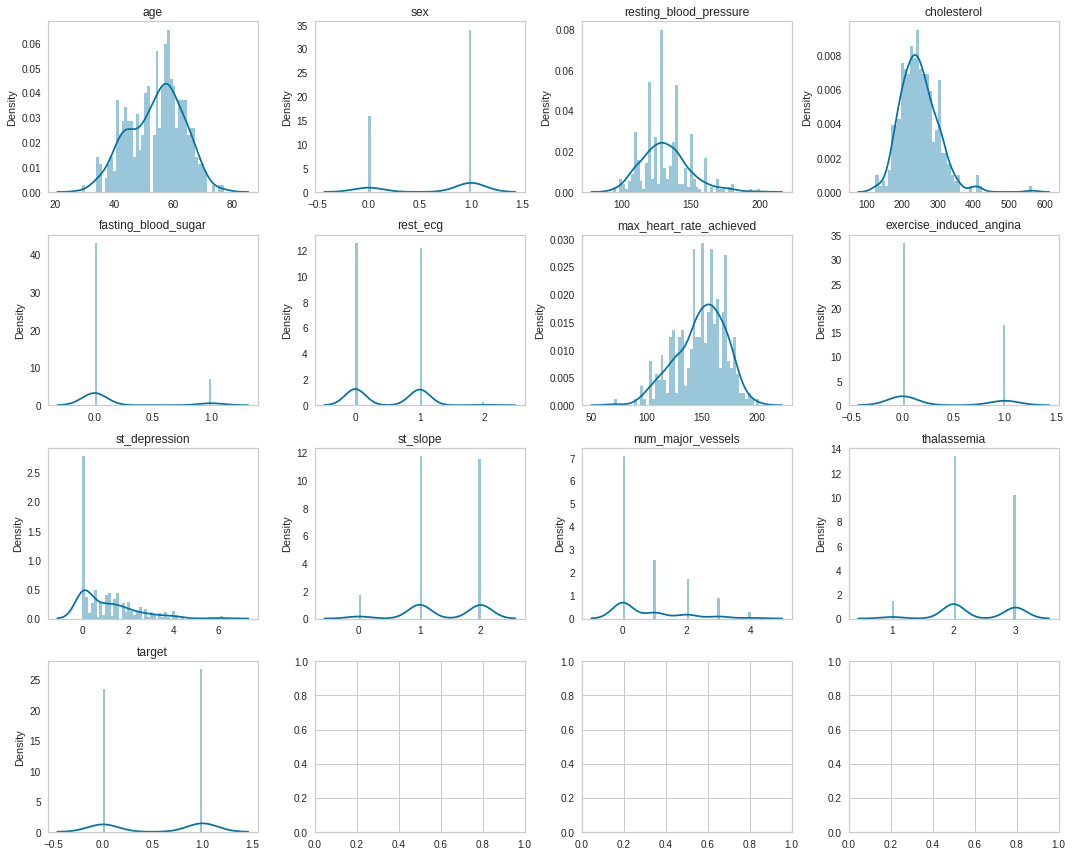

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize = (15,12))

for ax, col in zip(axes.flat, num_feature):
    sns.distplot(a = df[col], bins = 50, ax = ax)
    ax.set_title(col)
    plt.setp(axes, xlabel = '')
    ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- **Positively Skewed Features:**
  - resting_blood_pressure
  - cholesterol
  - st_depression
  - num_major_vessels
  - fasting_blood_sugar
  - rest_ecg
  - exercise_induced_angina
  - st_slope
  - thalassemia
- **Negatively Skewed Features:**
  - age
  - sex
- **Normally Skewed Features:**
  - None

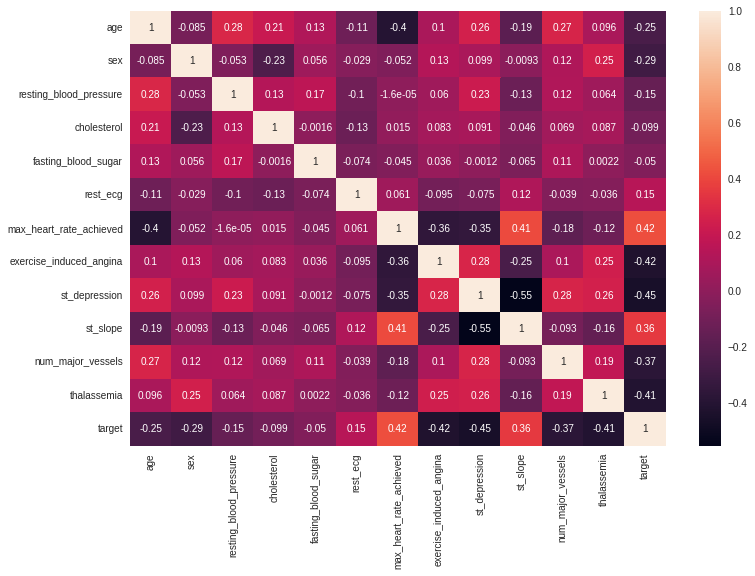

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

#### Finding Duplicate rows in the dataset

In [15]:
duplicate = df[df.duplicated()]
print(len(duplicate))

41


**Observation:**

- **Report shows** that **there** are total **14 variables** out of which **6 are numeric, 4 are boolean and 4 are categorical**.
- There exists **41 duplicate rows**.
- Features like **st_depression and num_major_vessels contains zeros**.
- **age** is **negatively correlated** with **max_heart_rate_achieved**.
- **st_depression** is **negatively correlated** with **st_slope**.
- **Cholesterol** feature shows there are **18 null values** along with the significance that feature is **normally distribution**.
- **max_heart_rate_achieved** feature shows **left skewness** in addition with **27 null values**.

## Data Preprocessing

### Identification and Handling of Missing values

#### Handling NULL values

In [16]:
null_frame = pd.DataFrame(index = df.columns.values)
null_frame['Null Frequency'] = df.isnull().sum().values
percent = df.isnull().sum().values/df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
Null Frequency,0.0,0.0,0.0,0.0,18.00,0.0,0.0,27.00,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,4.92,0.0,0.0,7.38,0.0,0.0,0.0,0.0,0.0,0.0


- **cholestrol**:
  - Missing Information (18) &rarr; Replace with Median value.
- **max_heart_rate_achieved**:
  - Missing Information (27) &rarr; Replace with Median value.

In [17]:
df['cholesterol'] = df['cholesterol'].replace(np.nan, df['cholesterol'].median())

In [18]:
df['max_heart_rate_achieved'] = df['max_heart_rate_achieved'].replace(np.nan, df['max_heart_rate_achieved'].median())

In [19]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

**Observation:**

- **All the NULL values are removed successfully**.

### Handling Duplicate Data

In [20]:
print('Contains Redundant Records?:', df.duplicated().any())
print('Duplicate Count:', df.duplicated().sum())

Contains Redundant Records?: True
Duplicate Count: 41


- **There are 41 Duplicate data in the dataset**

In [21]:
df.drop_duplicates(inplace = True)

In [22]:
print('Contains Redundant Records?:', df.duplicated().any())
print('Duplicate Count:', df.duplicated().sum())

Contains Redundant Records?: False
Duplicate Count: 0


- **We have successfully removed the duplicate data**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 363
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      325 non-null    int64  
 1   sex                      325 non-null    int64  
 2   chest_pain_type          325 non-null    object 
 3   resting_blood_pressure   325 non-null    int64  
 4   cholesterol              325 non-null    float64
 5   fasting_blood_sugar      325 non-null    int64  
 6   rest_ecg                 325 non-null    int64  
 7   max_heart_rate_achieved  325 non-null    float64
 8   exercise_induced_angina  325 non-null    int64  
 9   st_depression            325 non-null    float64
 10  st_slope                 325 non-null    int64  
 11  num_major_vessels        325 non-null    int64  
 12  thalassemia              325 non-null    int64  
 13  target                   325 non-null    int64  
dtypes: float64(3), int64(10), 

- **Now as we can see the dataset is having 325 data after dropping the duplicate data**

In [24]:
df['chest_pain_type'].unique()

array(['asymptomatic', 'non-anginal pain', 'atypical angina',
       'typical anginia', 'typical angina'], dtype=object)

**Observation:**

- We can see that label **typical angina was incorrectly typed as typical anginia**.

In [25]:
df['chest_pain_type'] = df['chest_pain_type'].str.replace(pat = 'typical anginia', repl = 'typical angina')

## Exploratory Data Analysis

**<h4>Question 1: What is the proportion of males and females having heart disease or not?</h4>**

In [26]:
male_data = df[df['sex'] == 1]
female_data = df[df['sex'] == 0]

No handles with labels found to put in legend.


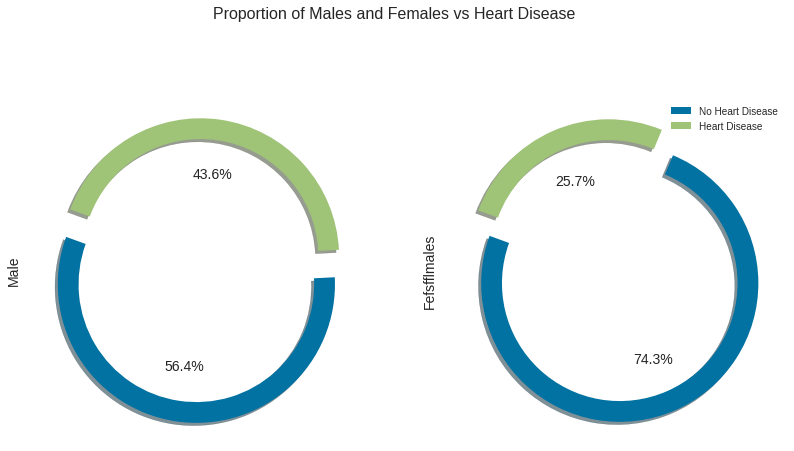

In [27]:
figure = plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
space = np.ones(2)/10
male_data['target'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''])
plt.legend()
plt.ylabel('Male', size = 14)

plt.subplot(1,2,2)
space = np.ones(2)/10
female_data['target'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''])
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Fefsfflmales', size = 14)
plt.suptitle('Proportion of Males and Females vs Heart Disease', size = 16)
plt.show()

**Observation:**

- Around **56% of males don't have heart disease** while **~44% of male** patients **have any heart disease**.
- Around **74% of female patients don't have heart disease** while **~26% of female patients have any heart disease**.

**<h4>Question 2: What is the proportion of males and females having different type of chest pain?</h4>**

- **Typical Angina**: It is the presence of substernal chest pain or discomfort that was provoked by exertion or emotional stress and was relieved by rest and/or nitroglycerin.
- **Non-Anginal Pain**: It is defended with the possibility of avoiding diagnoses such as "atypical chest pain" or "atypical angina."
- **Atypical Angina**: It implies that the complaint is actually angina pecto- ris, though not conforming in every way to the expected or classic description.
- **Asymptomatic**: It means neither causing nor exhibiting symptoms of disease.

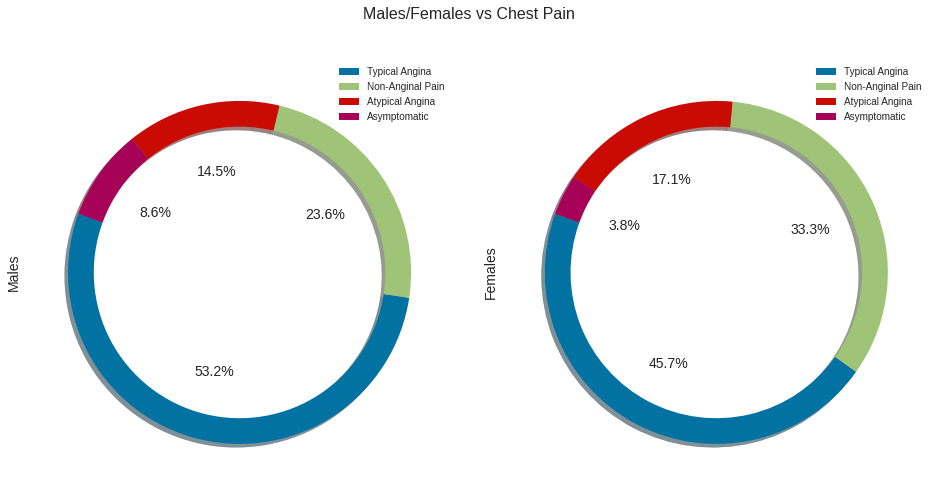

In [28]:
males_data = df[df['sex'] == 1]
females_data = df[df['sex'] == 0]

figure = plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
space = np.ones(2)/10

males_data['chest_pain_type'].value_counts().plot(kind = 'pie', fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', '', '', ''])
plt.legend(['Typical Angina', 'Non-Anginal Pain', 'Atypical Angina', 'Asymptomatic'])
plt.ylabel('Males', size = 14)


plt.subplot(1, 2, 2)
space = np.ones(4)/10
females_data['chest_pain_type'].value_counts().plot(kind = 'pie', fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', '', '', ''])
plt.legend(['Typical Angina', 'Non-Anginal Pain', 'Atypical Angina', 'Asymptomatic'])
plt.ylabel('Females', size = 14)
plt.suptitle('Males/Females vs Chest Pain', size = 16)
plt.tight_layout(pad = 3.0)
plt.show()

**Observation:**

- **Males:**
  - Around **53% of males** have chest pain of **typical angina**.
  - Around **24% of males** have chest pain of n**on anginal pain**.
  - Around **15% of males** have chest pain of **atypical angina.**
  - Around **9% of males** have chest pain of **asymptomatic**.

- **Females:**
  - Around **46% of females** have chest pain of **typical angina**.
  - Around **33% of females** have chest pain of **non anginal pain**.
  - Around **17% of females** have chest pain of **atypical angina**.
  - Around **4% of females** have chest pain of **asymptomatic**.

**<h4>Question 3: What is the frequency of patients corresponding to the slope of the peak exercise ST segment?</h4>**

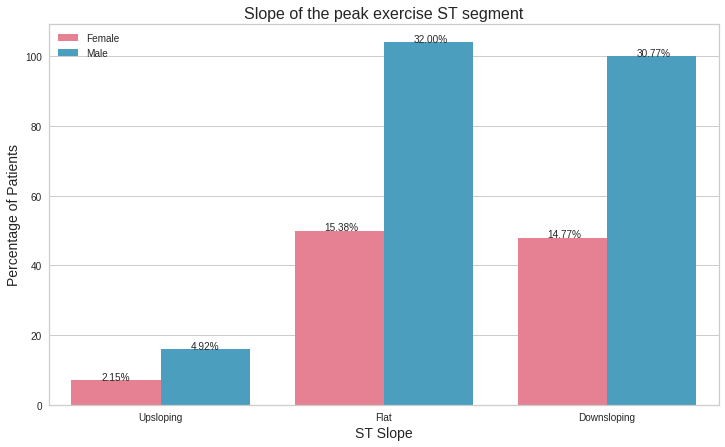

In [29]:
figure = plt.figure(figsize = [12, 7])

ax = sns.countplot(x = 'st_slope', hue = 'sex', data = df, palette = ['#F67088', '#38A7D0'])
total = df.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('ST Slope', size = 14)
plt.xticks(ticks = [0, 1, 2], labels = ['Upsloping', 'Flat', 'Downsloping'], rotation = 0)
plt.ylabel('Percentage of Patients', size = 14)
plt.legend(labels = ['Female', 'Male'])
plt.title('Slope of the peak exercise ST segment', size = 16)
plt.show()

**Observation:**

- **Males have ST slope more than females**.
- **Upsloping:**
  - **Males** have ST slope of **~5%** while **females** have ST slope of **~2%**.
- **Flat:**
  - **Males** have ST slope of **32%** while **females** have ST slope of **~15%**.
- **Downsloping:**
  - **Males**  have ST slope of **31%** while **females** have ST slope of **~15%**.

**<h4>Question 4: How much proportion of people having the heart disease or not with respect to their fasting blood sugar?</h4>**

- **Note:** A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal for healthy person.

In [30]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,asymptomatic,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,atypical angina,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,typical angina,120,354.0,0,1,163.0,1,0.6,2,0,2,1


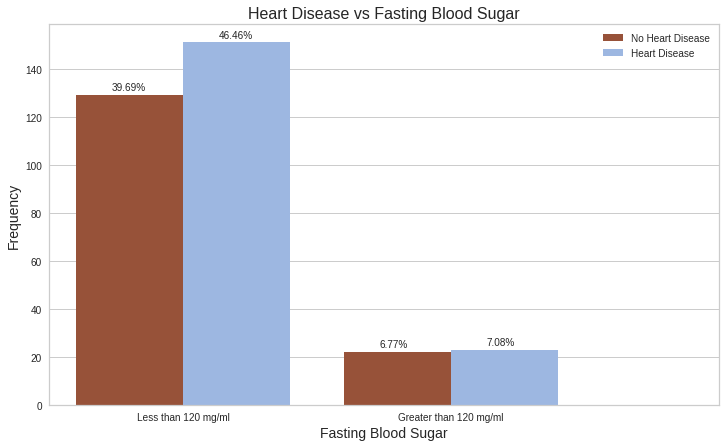

In [31]:
plt.figure(figsize = (12,7))

ax = sns.countplot(x = 'fasting_blood_sugar', hue = 'target', data = df, palette = ['#A64B2A', '#92B4EC'])
total = df.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()+2
  ax.annotate(percentage, (x,y))

plt.xlabel('Fasting Blood Sugar', size = 14)
plt.xticks(ticks = [0,1,2], labels = ['Less than 120 mg/ml', 'Greater than 120 mg/ml'], rotation = 0)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Heart Disease', 'Heart Disease'])
plt.title('Heart Disease vs Fasting Blood Sugar', size = 16)
plt.show()

**Observation:**

- **46% of patients** who have **fasting blood sugar < 120 mg/dl have heart disease** while **~40% of patients** who have **fasting blood sugar < 120 mg/dl dont have heart disease**.

- **7% of patients** who have **fasting blood sugar > 120 mg/dl have heart disease** while **~7% of patients who have fasting blood sugar < 120 mg/dl dont have heart disease**.

**<h4>Question 5: What is the frequency and proportion of patients having heart disease or not based on the type of chest pain?</h4>**

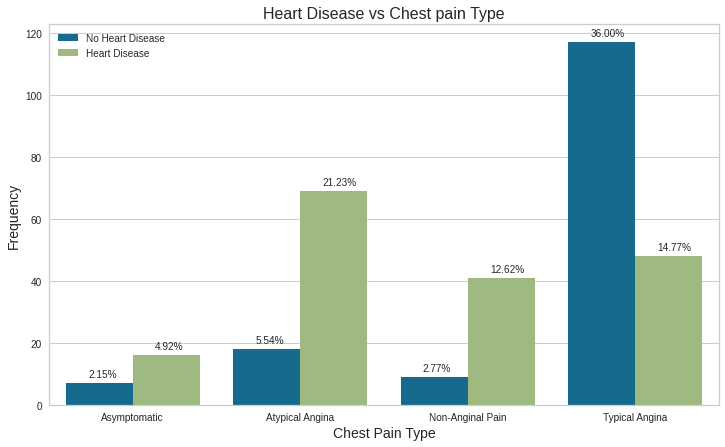

In [32]:
plt.figure(figsize = (12,7))

ax = sns.countplot(x = 'chest_pain_type', hue = 'target', data = df)
total = df.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x,y))

plt.xlabel('Chest Pain Type', size = 14)
plt.xticks(ticks = [0,1,2,3], labels = ['Asymptomatic', 'Atypical Angina', 'Non-Anginal Pain', 'Typical Angina'], rotation = 0)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Heart Disease', 'Heart Disease'])
plt.title('Heart Disease vs Chest pain Type', size = 16)
plt.show()

**Observation:**

- **Patients** suffering from **Asymptomatic Chest Pain** 
are approx **2X more** likely to  **have heart disease**.

- **Patients** suffering from **Atypical Angina Chest Pain** 
are approx **4X more** likely to  **have heart disease**.

- **Patients** suffering from **Non-Anginal Chest Pain** 
are approx **4X more** likely to  **have heart disease**.

- **Patients** suffering from **Typical Angina Chest Pain** 
are approx **2X more** likely to  **have heart disease**.

**<h4>Question 6: What is the frequency and proportion of patients having heart disease or not based on their thalassemia?</h4>**

**Note:** 

- Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin.

- **Normal Thalassemia:** The body makes normal amount of hemoglobin.
- **Fixed Defect Thalassemia:** The body has inherited defect of producing abnormal amount of haemoglobin.
- **Reversable Defect Thalassemia:** The body has inherited defect of producing abnormal amount of haemoglobin but the defect is reversable to normal.

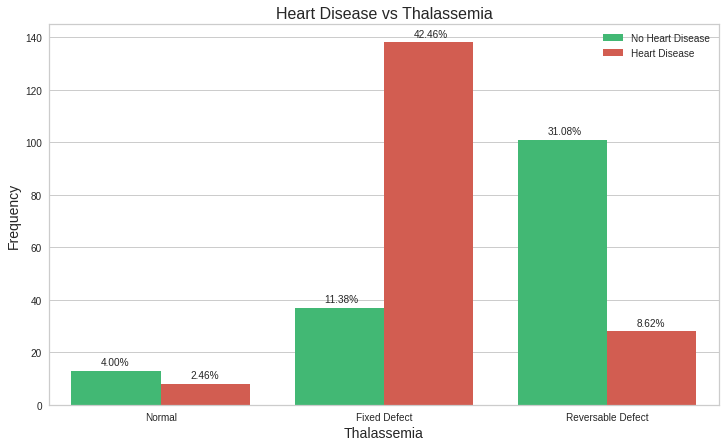

In [33]:
figure = plt.figure(figsize = [12, 7])

ax = sns.countplot(x = 'thalassemia', hue = 'target', data = df, palette = ['#2ECC71', '#E74C3C'])
total = df.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.xlabel('Thalassemia', size = 14)
plt.xticks(ticks = [0, 1, 2], labels = ['Normal', 'Fixed Defect', 'Reversable Defect'], rotation = 0)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Heart Disease', 'Heart Disease'])
plt.title('Heart Disease vs Thalassemia', size = 16)
plt.show()

**Observation:**

- Patients having **Normal Thalassemia** are **2X less likely to have heart disease**.

- Patients having **Fixed Defect Thalassemia** are **4X more likely to have heart disease**.

- Patients having **Reversable Defect Thalassemia** are **3X less likely to have heart disease**.

**<h4>Question 7: What is the association of cholesterol with age based on the sex of patients?</h4>**

- **Note:** Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults.

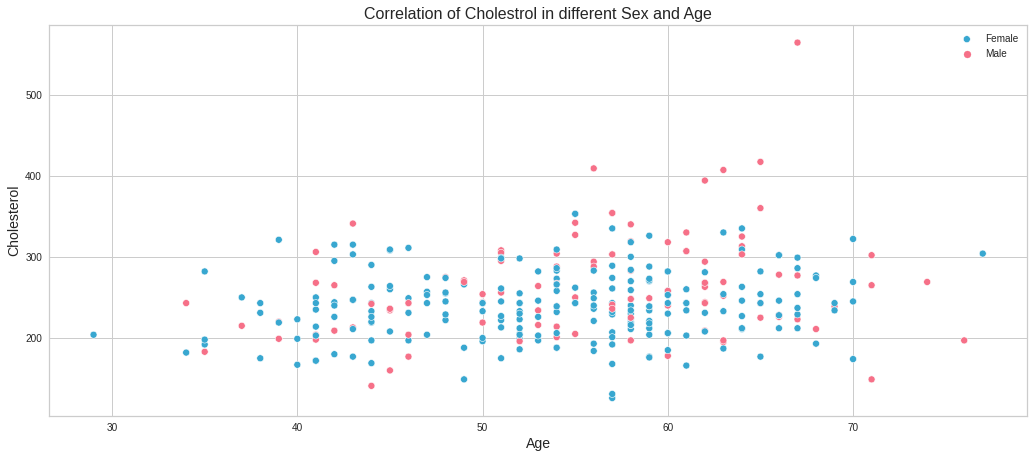

In [34]:
figure = plt.figure(figsize = [15, 7])
sns.scatterplot(x = 'age', y = 'cholesterol', hue = 'sex', data = df, palette = ['#F67088', '#38A7D0'])
plt.xlabel('Age', size = 14)
plt.ylabel('Cholesterol', size = 14)
plt.title('Correlation of Cholestrol in different Sex and Age', size = 16)
plt.legend(labels = ['Female', 'Male'])
plt.tight_layout(pad = 3.0)
plt.show()

**Observation:**

- Both **male and female** patients seem to **similar cholesterol levels upto 60 years**.
- **Some female patients above 60 years** have **higher cholestrol** than male patients of the same age.

<a id = Section71></a>
### **Encoding Categorical Features**

In [35]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,asymptomatic,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,atypical angina,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,typical angina,120,354.0,0,1,163.0,1,0.6,2,0,2,1


### **Observation**
- Chest pain only contains the categorical features

In [36]:
df = pd.get_dummies(data = df, columns = ['chest_pain_type'], drop_first = True)

In [37]:
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina
0,63,1,145,233.0,1,0,150.0,0,2.3,0,0,1,1,0,0,0
1,37,1,130,250.0,0,1,187.0,0,3.5,0,0,2,1,0,1,0
2,41,0,130,204.0,0,0,172.0,0,1.4,2,0,2,1,1,0,0
3,56,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1,1,0,0
4,57,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1,0,0,1


## Feature Selection

- **Below** we have **implemented** a function namely, **SelectFromModel** **available** in **Sklearn** which **uses** the **base estimator** to **identify** **important features**.


In [38]:
X = df.drop('target', axis = 1)
Y = df['target']

In [39]:
X.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina
0,63,1,145,233.0,1,0,150.0,0,2.3,0,0,1,0,0,0
1,37,1,130,250.0,0,1,187.0,0,3.5,0,0,2,0,1,0
2,41,0,130,204.0,0,0,172.0,0,1.4,2,0,2,1,0,0
3,56,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1,0,0
4,57,0,120,354.0,0,1,163.0,1,0.6,2,0,2,0,0,1


### Extracting important features

In [40]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X,Y)

selected_features = X.columns[(selector.get_support())].tolist()

print('Total Feature Selected are: ', len(selected_features))

print('Threshold set by model: ', np.round(selector.threshold_, decimals = 2))
print('Features: ', selected_features)

Total Feature Selected are:  8
Threshold set by model:  0.07
Features:  ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'thalassemia', 'chest_pain_type_typical angina']


**Visualzation of Important Features:**

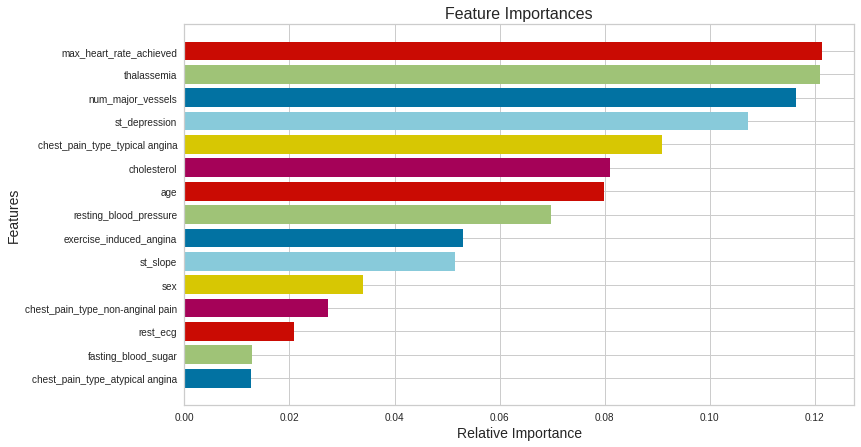

In [41]:
plt.figure(figsize = (12,7))
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, Y)
plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

## Data Preperation

In [42]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [43]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (260, 15) (260,)
Testing Data Shape: (65, 15) (65,)


### Function to plot Precision Reacall Curve

In [44]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

## Machine Learning Model

### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_

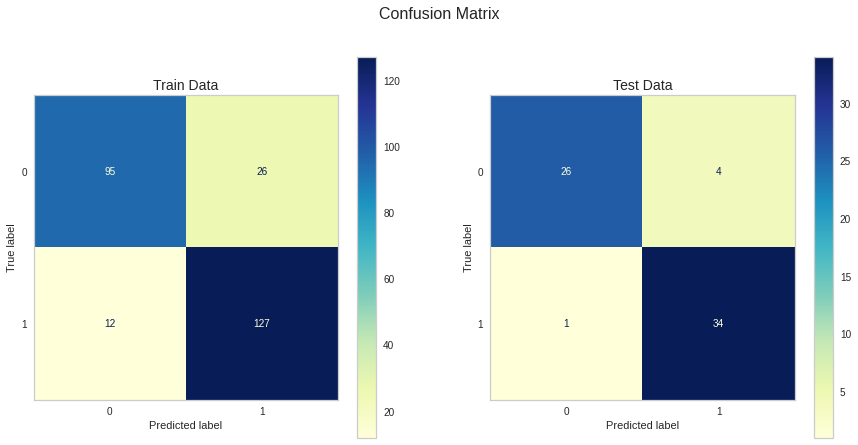

In [45]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)

y_train_pred_proba = log.predict_proba(X_train)
y_test_pred_proba = log.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = log, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = log, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **95 instances correctly** for **negative class** while **127 instances** were predicted **correctly** for **positive class**.
  - Model **identified 12 instances negative but in actual** they **were positive**.
  - Model **identified 26 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **26 instances correctly** for **negative class** while **34 instances** were predicted **correctly** for **positive class**.
  - Model **identified 1 instance negative but in actual** it **was positive**.
  - Model **identified 4 instances positive but in actual** they **were negative**.

In [46]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       121
           1       0.83      0.91      0.87       139

    accuracy                           0.85       260
   macro avg       0.86      0.85      0.85       260
weighted avg       0.86      0.85      0.85       260

                    Testing Report           
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.89      0.97      0.93        35

    accuracy                           0.92        65
   macro avg       0.93      0.92      0.92        65
weighted avg       0.93      0.92      0.92        65



**Observation:**

- We can see that **average precision** for **training data is 86%** while **for testing data it is 95%**.
- The **average recall** for **training data is 64%** while **for testing data it is 57%**.

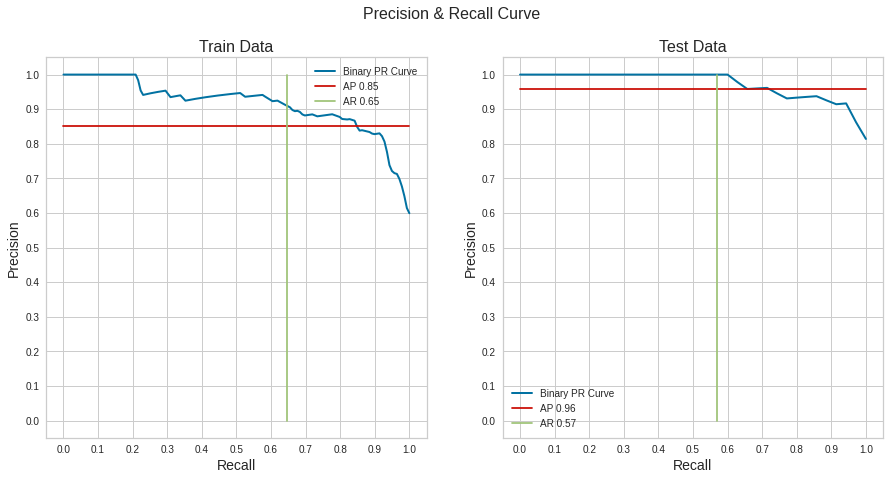

In [47]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

## Support Vector Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


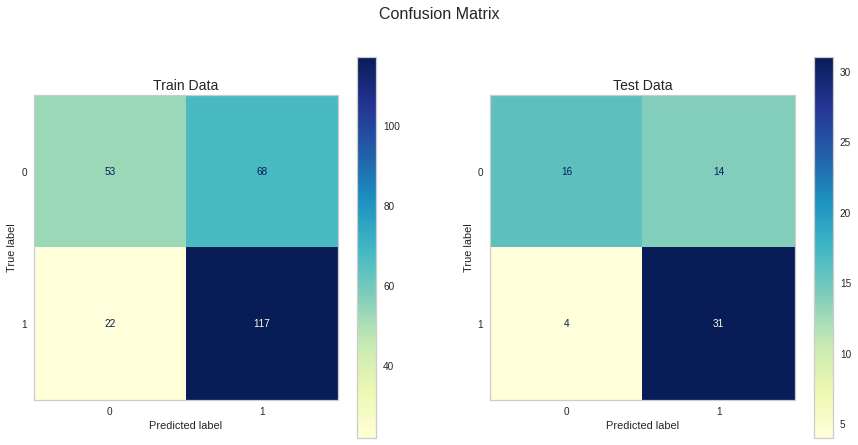

In [48]:
svc_clf = SVC(random_state = 42, probability = True)
svc_clf.fit(X_train, y_train)

y_train_pred_count = svc_clf.predict(X_train)
y_test_pred_count = svc_clf.predict(X_test)

y_train_pred_proba = svc_clf.predict_proba(X_train)
y_test_pred_proba = svc_clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = svc_clf, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = svc_clf, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **53 instances correctly** for **negative class** while **117 instances** were predicted **correctly** for **positive class**.
  - Model **identified 22 instances negative but in actual** they **were positive**.
  - Model **identified 68 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **16 instances correctly** for **negative class** while **31 instances** were predicted **correctly** for **positive class**.
  - Model **identified 4 instance negative but in actual** they **were positive**.
  - Model **identified 14 instances positive but in actual** they **were negative**.

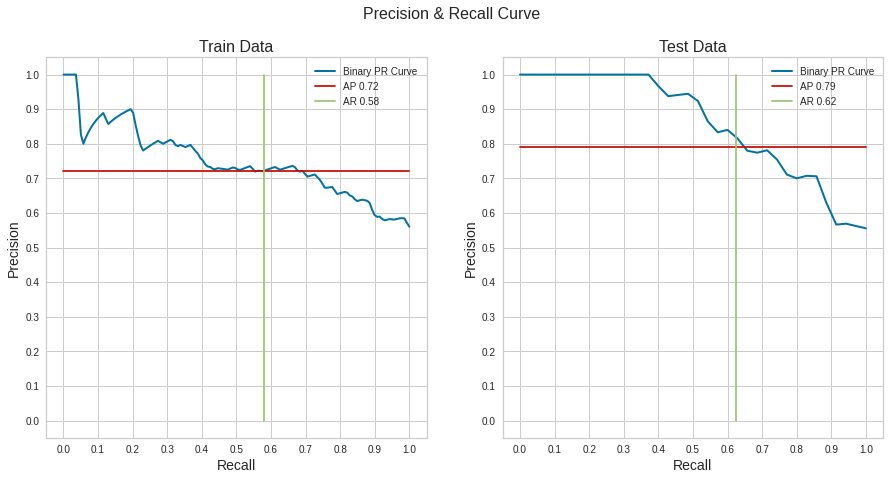

In [49]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 72%** while **for testing data it is 79%**.
- The **average recall** for **training data is 58%** while **for testing data it is 62%**.

## Decision Tree Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


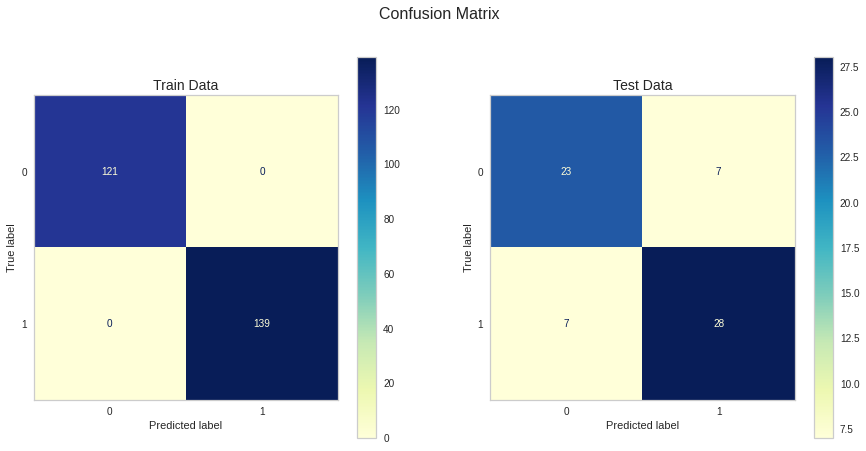

In [50]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, y_train)

y_train_pred_count = dtc.predict(X_train)
y_test_pred_count = dtc.predict(X_test)

y_train_pred_proba = dtc.predict_proba(X_train)
y_test_pred_proba = dtc.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = dtc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = dtc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **121 instances correctly** for **negative class** while **139 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **23 instances correctly** for **negative class** while **28 instances** were predicted **correctly** for **positive class**.
  - Model **identified 7 instance negative but in actual** they **were positive**.
  - Model **identified 7 instances positive but in actual** they **were negative**.


In [51]:
dtc_report_train = classification_report(y_train, y_train_pred_count)
dtc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(dtc_report_train)
print('                    Testing Report           ')
print(dtc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       139

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

                    Testing Report           
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.80      0.80      0.80        35

    accuracy                           0.78        65
   macro avg       0.78      0.78      0.78        65
weighted avg       0.78      0.78      0.78        65



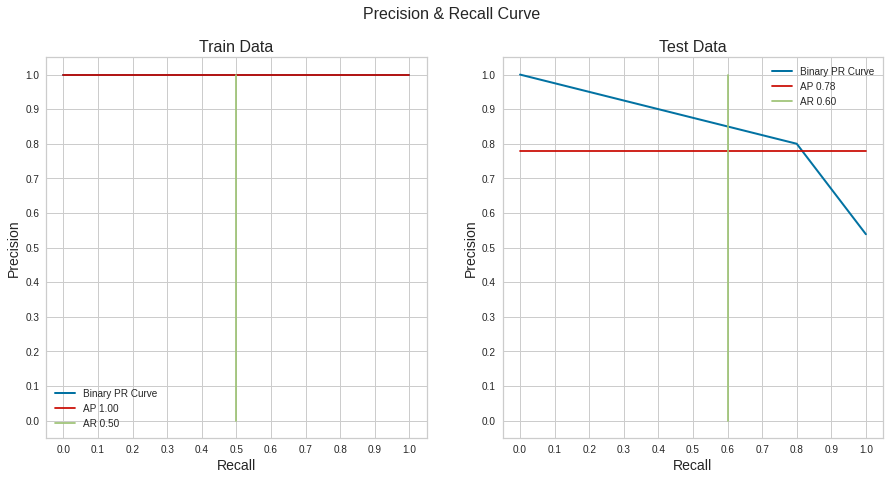

In [52]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 100%** while **for testing data it is 78%**.
- The **average recall** for **training data is 50%** while **for testing data it is 59%**.

## Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


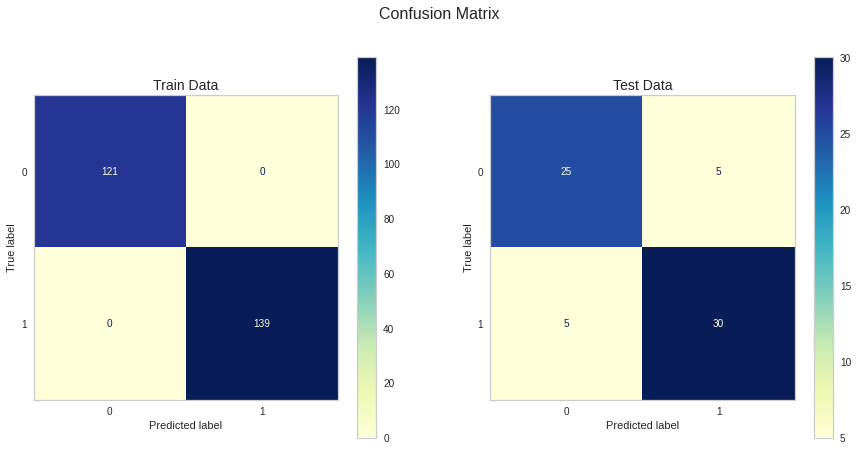

In [53]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **121 instances correctly** for **negative class** while **139 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **25 instances correctly** for **negative class** while **30 instances** were predicted **correctly** for **positive class**.
  - Model **identified 5 instance negative but in actual** they **were positive**.
  - Model **identified 5 instances positive but in actual** they **were negative**.

In [54]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       139

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

                    Testing Report           
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.86      0.86      0.86        35

    accuracy                           0.85        65
   macro avg       0.85      0.85      0.85        65
weighted avg       0.85      0.85      0.85        65



**Observation:**

- **Accuracy** for **training data is high** as **compared to testing data signifying overfitting** over train data.
- But our **accuracy on test has increased over rest models**.
- **Similar is the case with Precision and recall** for training data and testing data.
- It shows that **Random Forest worked better than other models**, which we **will tune in upcomming section**.

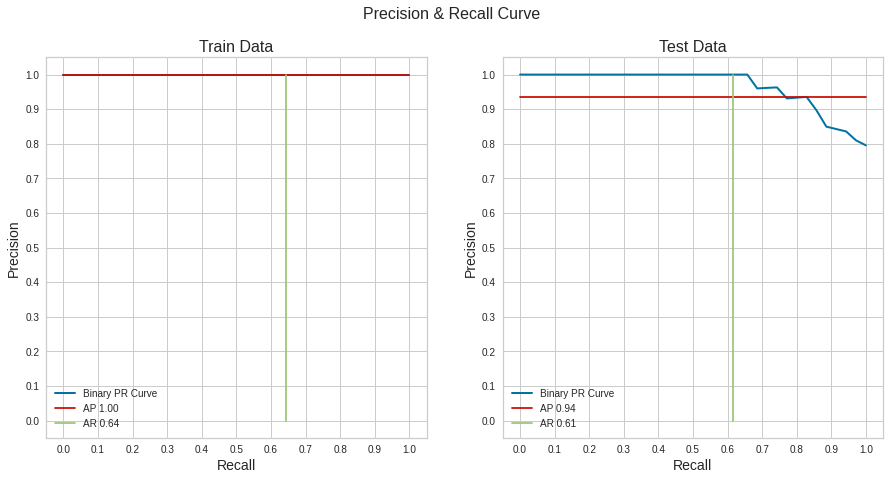

In [55]:
# NOTE: This precision and recall have been plotted only for positive class i.e. patient has heart disease

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 100%** while **for testing data it is 94%**.
- The **average recall** for **training data is 66%** while **for testing data it is 58%**.

## Model Tuning

In [56]:
parameter_grid = [{'n_estimators' : [100, 200, 300, 400, 500], 'criterion':['gini', 'entropy'], 'max_depth' : [x for x in range(2, 10)], 'bootstrap' : [True, False]}]

In [57]:
rand_forest = RandomForestClassifier(random_state = 42, n_jobs = -1)
random_search = GridSearchCV(estimator = rand_forest, param_grid = parameter_grid, scoring = 'f1', n_jobs = -1, cv = 10, return_train_score = True)
random_search.fit(X_train, y_train)
random_search.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [58]:
random_search.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'n_estimators': 200}

## Final Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


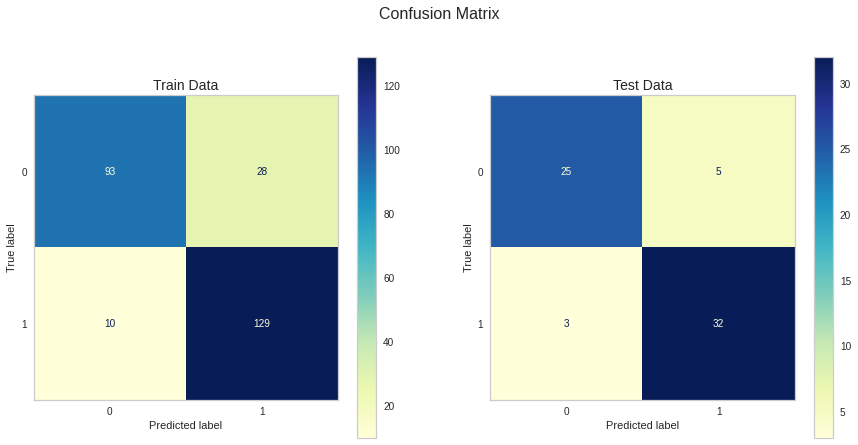

In [59]:
rfc = random_search.best_estimator_
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **93 instances correctly** for **negative class** while **129 instances** were predicted **correctly** for **positive class**.
  - Model **identified 10 instances negative but in actual** they **were positive**.
  - Model **identified 28 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **25 instances correctly** for **negative class** while **32 instances** were predicted **correctly** for **positive class**.
  - Model **identified 3 instance negative but in actual** they **were positive**.
  - Model **identified 5 instances positive but in actual** they **were negative**.|

In [60]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       121
           1       0.82      0.93      0.87       139

    accuracy                           0.85       260
   macro avg       0.86      0.85      0.85       260
weighted avg       0.86      0.85      0.85       260

                    Testing Report           
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.86      0.91      0.89        35

    accuracy                           0.88        65
   macro avg       0.88      0.87      0.88        65
weighted avg       0.88      0.88      0.88        65



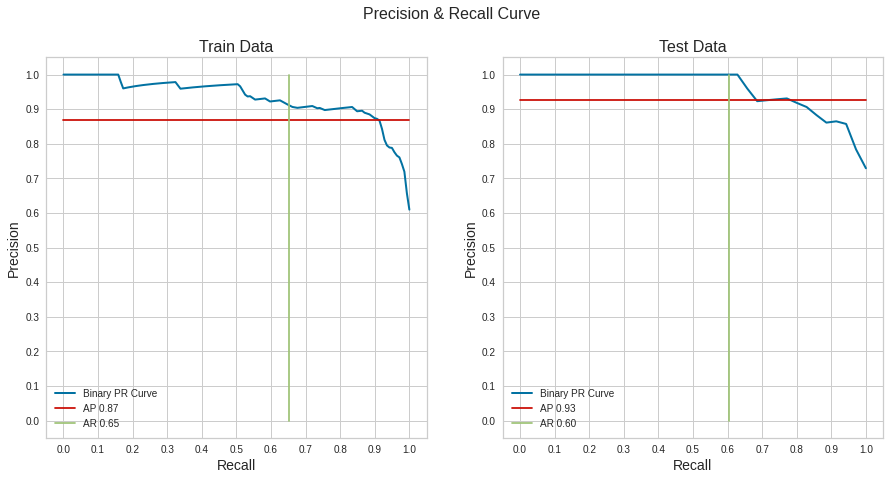

In [61]:
# NOTE: This precision and recall have been plotted only for positive class i.e. patient has heart disease

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

## Conclusion

- **Studied in depth about the data**, its **characteristics** and its **distribution**.

- **Explored various questions** related to the health of the patients (males and females).

- **Investigated in depth about the features** which to **retain** and which to **discard**. List of Retained Feature is as:
- age, resting_blood_pressure, cholesterol, max_heart_rate_achieved, st_depression, num_major_vessels, thalassemia, chest_pain_type

- **Peformed feature selection using Random Forest** because it is fast, accurate and reliable.
  
- **Performed model development** with **variety** of **algorithms** such as **Logistic Regression, SVM, Decision Tree & Random Forest**.

- **On observering** the **performance** of **SVM and Random Forest**, it could be clearly visualized that **SVM was underfitting while Random Forest was overfitting**.

- **One could choose either** of these **model or both** and **tune** it **at best settings**.

- **If both** models are **tuned** at **optimal settings**, a **comparision** is **required** to **select** the **optimal working model**.

- **Choosed Random Forest** and **tuned** it **at max settings** and **finalized** which **in resulted** a **promising generalized performance**.

- Now this **model** will **help** us in **saving** not only a lot of **resources** (money, human resources etc.) but also help us in **abstaining** the **delay** in **treatment** of the patients.